<a href="https://colab.research.google.com/github/sailakshmijaggarapu/SCT_DA_4/blob/main/SCT_TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign_dataset[1].csv to marketing_campaign_dataset[1].csv


In [12]:
import pandas as pd

df = pd.read_csv("marketing_campaign_dataset[1].csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [16]:
df["Date"] = pd.to_datetime(df["Date"])

df["Acquisition_Cost"] = (
    df["Acquisition_Cost"]
    .replace(r'[\$,]', '', regex=True)
    .astype(float)
)

df["CTR"] = df["Clicks"] / df["Impressions"]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  object        
 2   Campaign_Type     200000 non-null  object        
 3   Target_Audience   200000 non-null  object        
 4   Duration          200000 non-null  object        
 5   Channel_Used      200000 non-null  object        
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  object        
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

In [18]:
channel_summary = df.groupby("Channel_Used")[["ROI","CTR","Conversion_Rate","Acquisition_Cost"]].mean()
channel_summary.sort_values("ROI", ascending=False)

,ROI,CTR,Conversion_Rate,Acquisition_Cost
Channel_Used,,,,
Facebook,5.018699,0.140499,0.079992,12510.900942
Website,5.014167,0.140971,0.080183,12487.814748
Google Ads,5.003141,0.139190,0.080183,12528.031401
Email,4.996487,0.140543,0.080282,12526.387809
YouTube,4.993754,0.141196,0.079889,12481.390213
Instagram,4.988706,0.140037,0.079886,12491.760002


In [19]:
df.groupby("Channel_Used")[["Acquisition_Cost","Clicks","Impressions"]].sum()

,Acquisition_Cost,Clicks,Impressions
Channel_Used,,,
Email,420874104.0,18493963,184801107
Facebook,410595258.0,18037947,180659428
Google Ads,418912314.0,18340807,185006879
Instagram,417124850.0,18316654,183738455
Website,416593500.0,18414628,183806353
YouTube,416778582.0,18350407,183448082


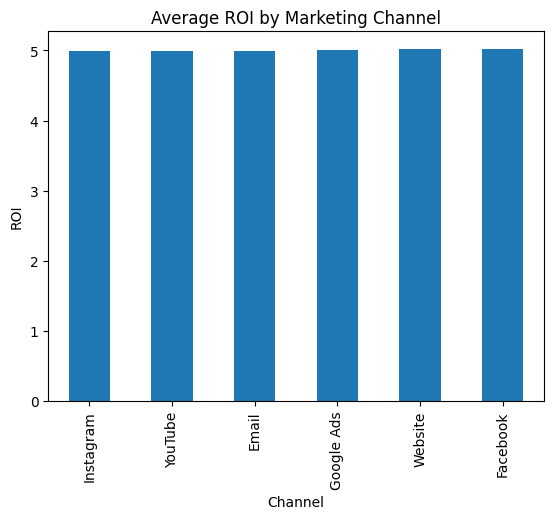

In [20]:
import matplotlib.pyplot as plt

df.groupby("Channel_Used")["ROI"].mean().sort_values().plot(kind="bar")
plt.title("Average ROI by Marketing Channel")
plt.ylabel("ROI")
plt.xlabel("Channel")
plt.show()

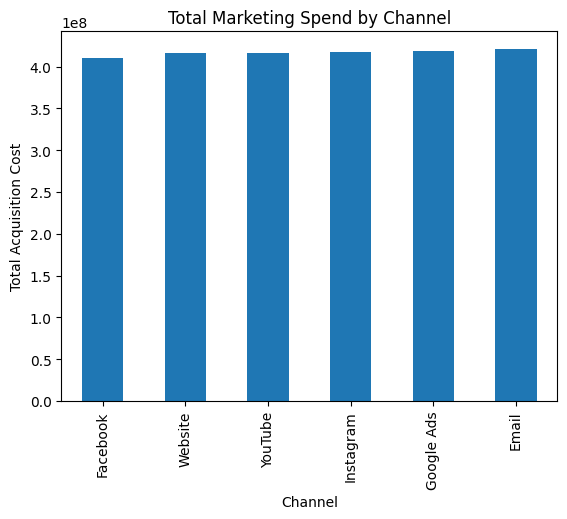

In [21]:
df.groupby("Channel_Used")["Acquisition_Cost"].sum().sort_values().plot(kind="bar")
plt.title("Total Marketing Spend by Channel")
plt.ylabel("Total Acquisition Cost")
plt.xlabel("Channel")
plt.show()

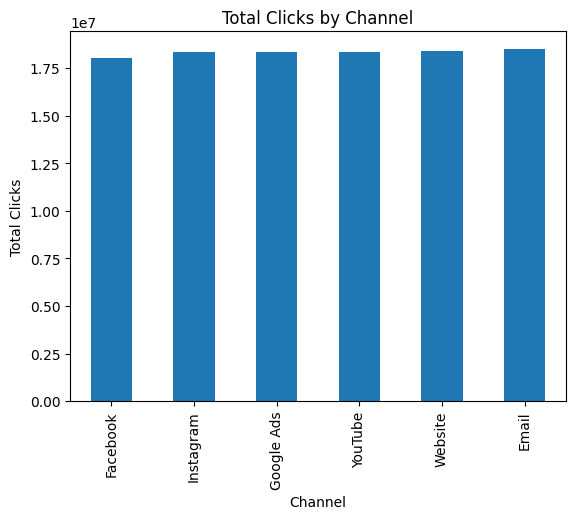

In [22]:
df.groupby("Channel_Used")["Clicks"].sum().sort_values().plot(kind="bar")
plt.title("Total Clicks by Channel")
plt.ylabel("Total Clicks")
plt.xlabel("Channel")
plt.show()

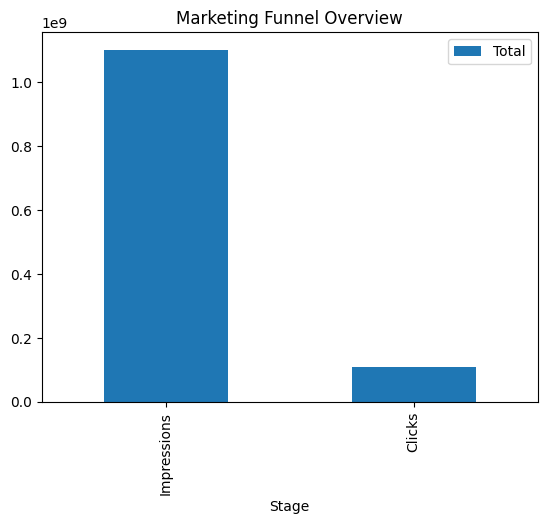

In [24]:
funnel_data = {
    "Stage": ["Impressions", "Clicks"],
    "Total": [df["Impressions"].sum(), df["Clicks"].sum()]
}

funnel_df = pd.DataFrame(funnel_data)

funnel_df.plot(kind="bar", x="Stage", y="Total")
plt.title("Marketing Funnel Overview")
plt.show()

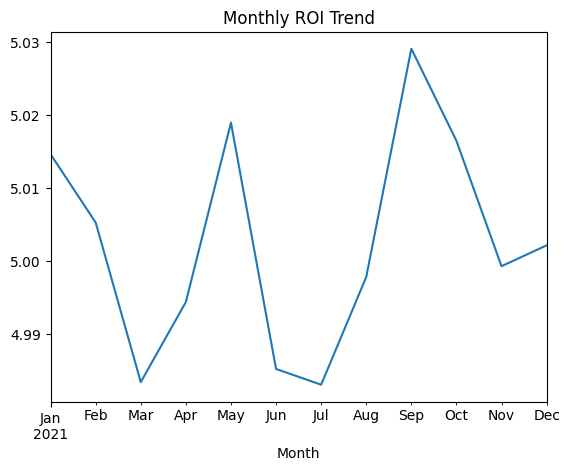

In [25]:
df["Month"] = df["Date"].dt.to_period("M")
df.groupby("Month")["ROI"].mean().plot()
plt.title("Monthly ROI Trend")
plt.show()

In [26]:
df.groupby("Customer_Segment")["ROI"].mean().sort_values(ascending=False)

,ROI
Customer_Segment,
Foodies,5.004376
Tech Enthusiasts,5.004234
Health & Wellness,5.003202
Fashionistas,5.000962
Outdoor Adventurers,4.999393


In [28]:
print("Key Insights:")
print("1. Facebook has highest average ROI.")
print("2. Email generates highest total clicks but with slightly lower ROI.")
print("3. ROI is stable across months.")
print("4. Customer segments show minimal variation in ROI.")
print("Recommendation: Maintain balanced budget, slightly favor Facebook.")

Key Insights:
1. Facebook has highest average ROI.
2. Email generates highest total clicks but with slightly lower ROI.
3. ROI is stable across months.
4. Customer segments show minimal variation in ROI.
Recommendation: Maintain balanced budget, slightly favor Facebook.
